# Project_1

### Citation
Citation Request: This dataset is publicly available for research. The details are described in [Moro et al., 2014]. Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001 [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

Title: Bank Marketing (with social/economic context)

Sources Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

Past Usage:

The full dataset (bank-additional-full.csv) was described and analyzed in:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

Relevant Information:

This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb. This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")

The zip file includes two datasets: 1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010). 2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv. The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

Number of Instances: 41188 for bank-additional-full.csv

Number of Attributes: 20 + output attribute.

Attribute information:

For more information, read [Moro et al., 2014].


### Import packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## EDA
- Univariate analysis: consider features separately, their distribution, descriptive statistics, anomalies, omissions, etc. (10%)
- Multivariate analysis: consider features in pairs, try to introduce new features to consider their relationship with other features, etc. (10%)

### Data loading

In [ ]:
# read dataset
data = pd.read_csv('Desktop/bank-additional-full.csv', delimiter=';')

In [ ]:
#return the first 5 rows of dataset.
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Data description
#### Bank client data:
   - 1 - age (numeric)
   - 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - 5 - default: has credit in default? (categorical: "no","yes","unknown")
   - 6 - housing: has housing loan? (categorical: "no","yes","unknown")
   - 7 - loan: has personal loan? (categorical: "no","yes","unknown")
#### Related with the last contact of the current campaign:
   - 8 - contact: contact communication type (categorical: "cellular","telephone")
   - 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   - 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### Other attributes:
   - 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   - 14 - previous: number of contacts performed before this campaign and for this client (numeric)
   - 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
#### Social and economic context attributes
   - 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   - 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
   - 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   - 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
   - 20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
   - 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


In [ ]:
data.shape

(41188, 21)

In [ ]:
# print information about a DataFrame including the index dtype and columns, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

From here we can see that there are no missing values in the table. In detailed analysis, we will handle "unknown" data.

In [ ]:
#drop duplicates and reset index
data = data.drop_duplicates(ignore_index = True)
data.shape

(41176, 21)

From here we conclude that there were duplicates in dataframe.

In [ ]:
# returns the number of missing values in every coumn of dataset
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# print the unique values in every column in the dataframe
column_list = data.columns.values.tolist()
for column_name in column_list:
    print('Number of unique in column',column_name,': ',data[column_name].nunique())
    print(column_name,': ',data[column_name].unique())
    print('-------------------------------------------------------------------------------------')

Number of unique in column age :  78
age :  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
-------------------------------------------------------------------------------------
Number of unique in column job :  12
job :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
-------------------------------------------------------------------------------------
Number of unique in column marital :  4
marital :  ['married' 'single' 'divorced' 'unknown']
-------------------------------------------------------------------------------------
Number of unique in column education :  8
education :  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--

From here we can conclude that there are no writing errors (for example, misspelled word and similar) in the values of the columns. Also, already here we can guess some values that are atypical for a certain column (for example value 999 in "pdays" column).

In [ ]:
(data.nunique() / len(data)).sort_values(ascending = False)

duration          0.037498
euribor3m         0.007674
age               0.001894
campaign          0.001020
pdays             0.000656
cons.conf.idx     0.000631
cons.price.idx    0.000631
job               0.000291
nr.employed       0.000267
month             0.000243
emp.var.rate      0.000243
previous          0.000194
education         0.000194
day_of_week       0.000121
marital           0.000097
default           0.000073
poutcome          0.000073
loan              0.000073
housing           0.000073
contact           0.000049
y                 0.000049
dtype: float64

In [ ]:
data.var().sort_values()[:5]

previous          0.244990
cons.price.idx    0.335055
emp.var.rate      2.467672
euribor3m         3.008272
campaign          7.674664
dtype: float64

Columns do not have very low variance, hence I decide not to delete any column.

### Splitting data- continuous and categorical

In [ ]:
# Splitting data - continuous and categorical
categorical = []
continuous = []

for column_name in data.columns:
    if data[column_name].dtype == object:
        categorical.append(column_name)
    else:
        continuous.append(column_name)

In [ ]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
continuous

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

### Categorical data

In [ ]:
# calculating some statistical data for categorical values
data[categorical].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


#### Plot categorical

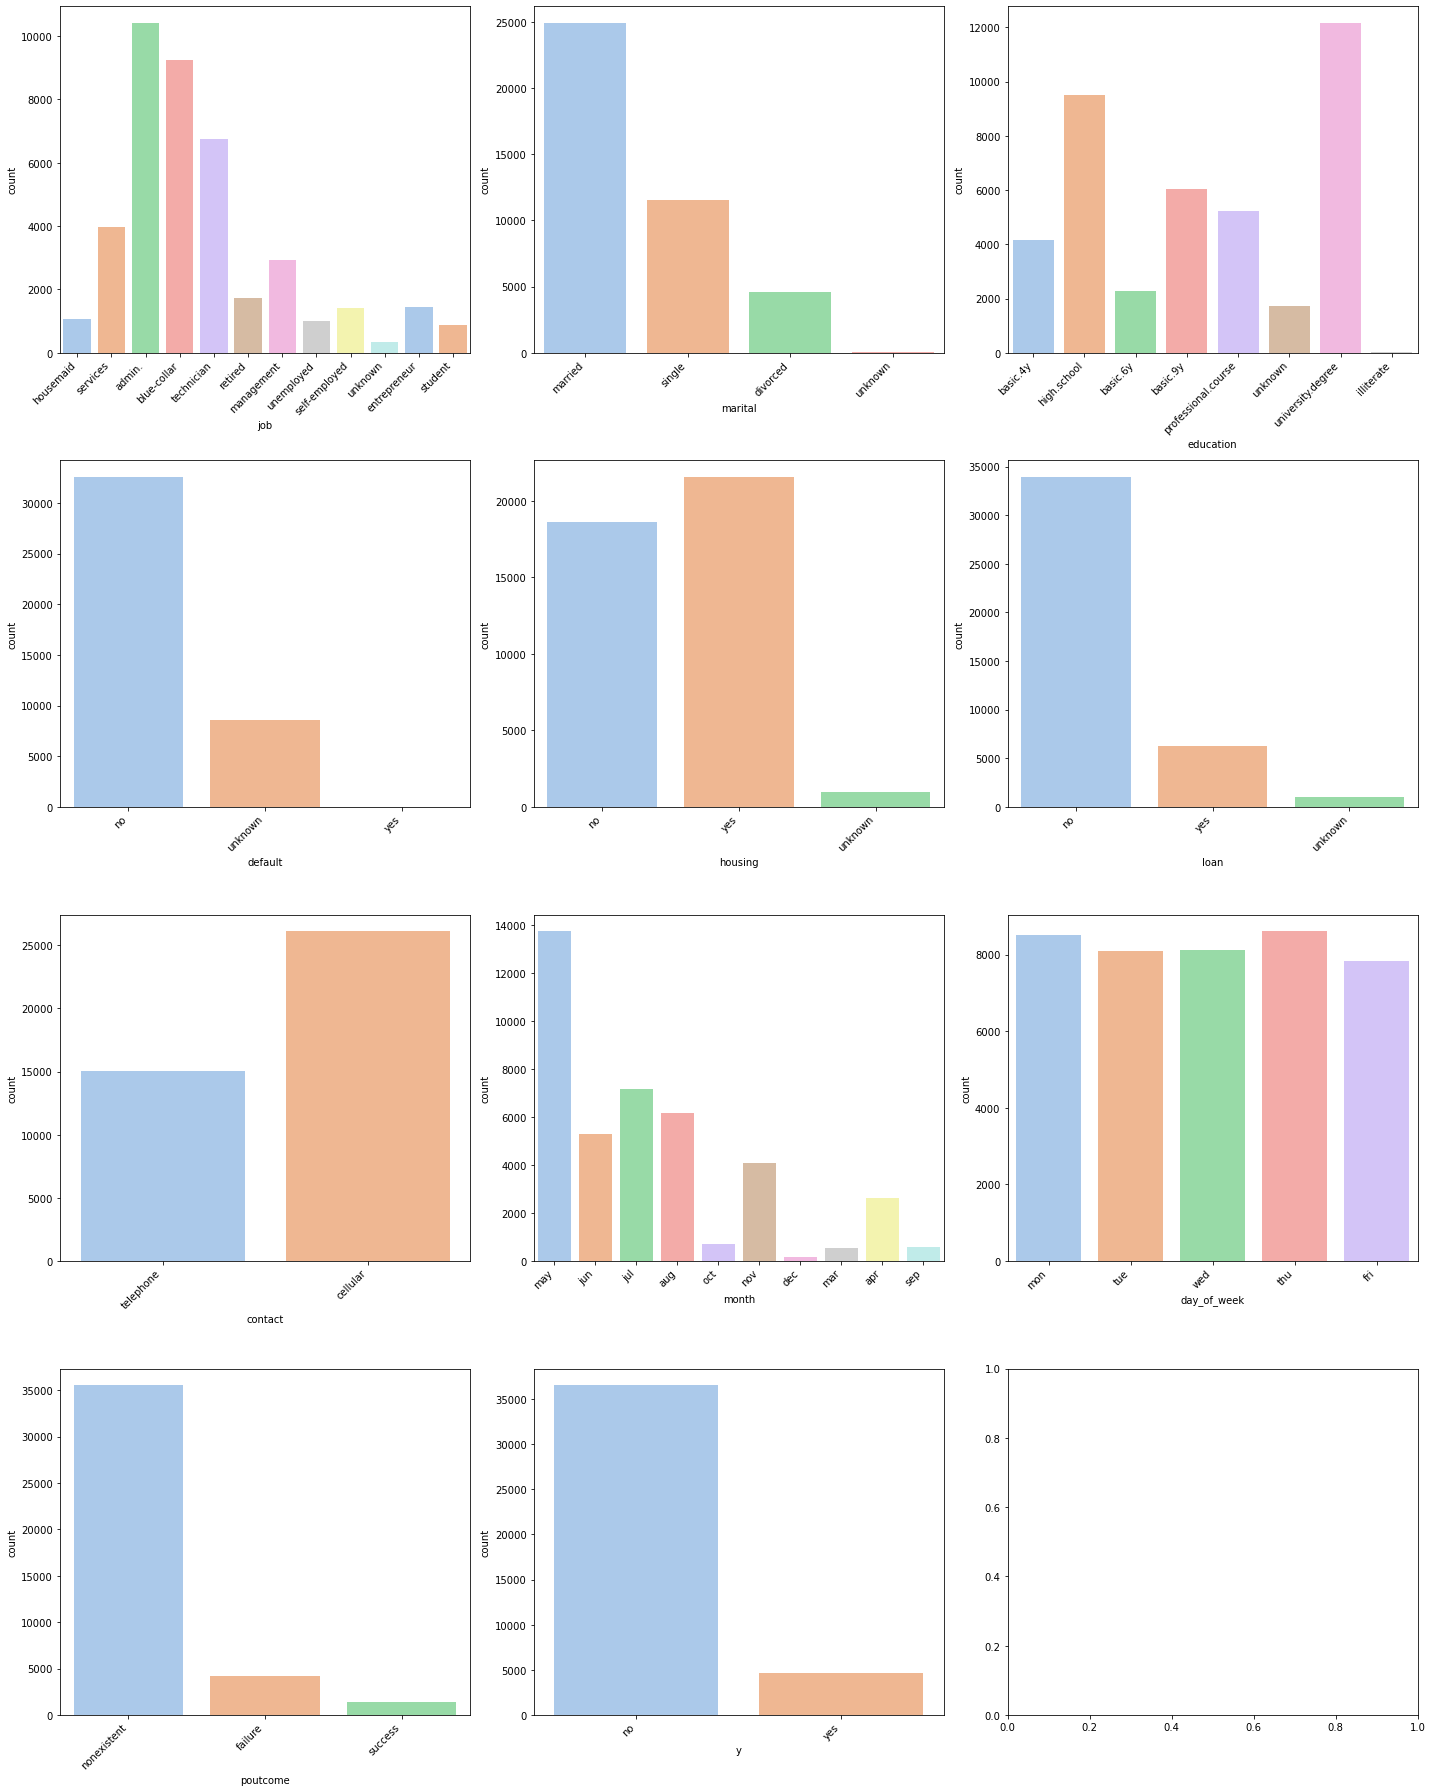

In [ ]:
# a figure of size 20x15 is created, which will contain 12 graphics, 4 columns, 3 rows
fig, ax = plt.subplots(4,3, figsize = (20,25))
ax = np.ravel(ax)
for i in range(len(categorical)):
    sns.countplot(data = data, x = categorical[i], ax = ax[i], palette = "pastel")
    ax[i].set_xticklabels(labels = data[categorical[i]].unique(), rotation = 45, ha = 'right')
ax = np.reshape(ax, (4, 3))
plt.tight_layout()

Categories "basic.4y", "basic.6y", "basic.9y" belong to the same education category, so we will map this to global name -> "basic".

In [ ]:
for i in range(len(data["education"])):
    if data["education"][i] in ["basic.4y", "basic.6y", "basic.9y"]:
        data["education"][i] = "basic"

The next graphics show the counts of observations in each categorical, grouped by "y" variable:

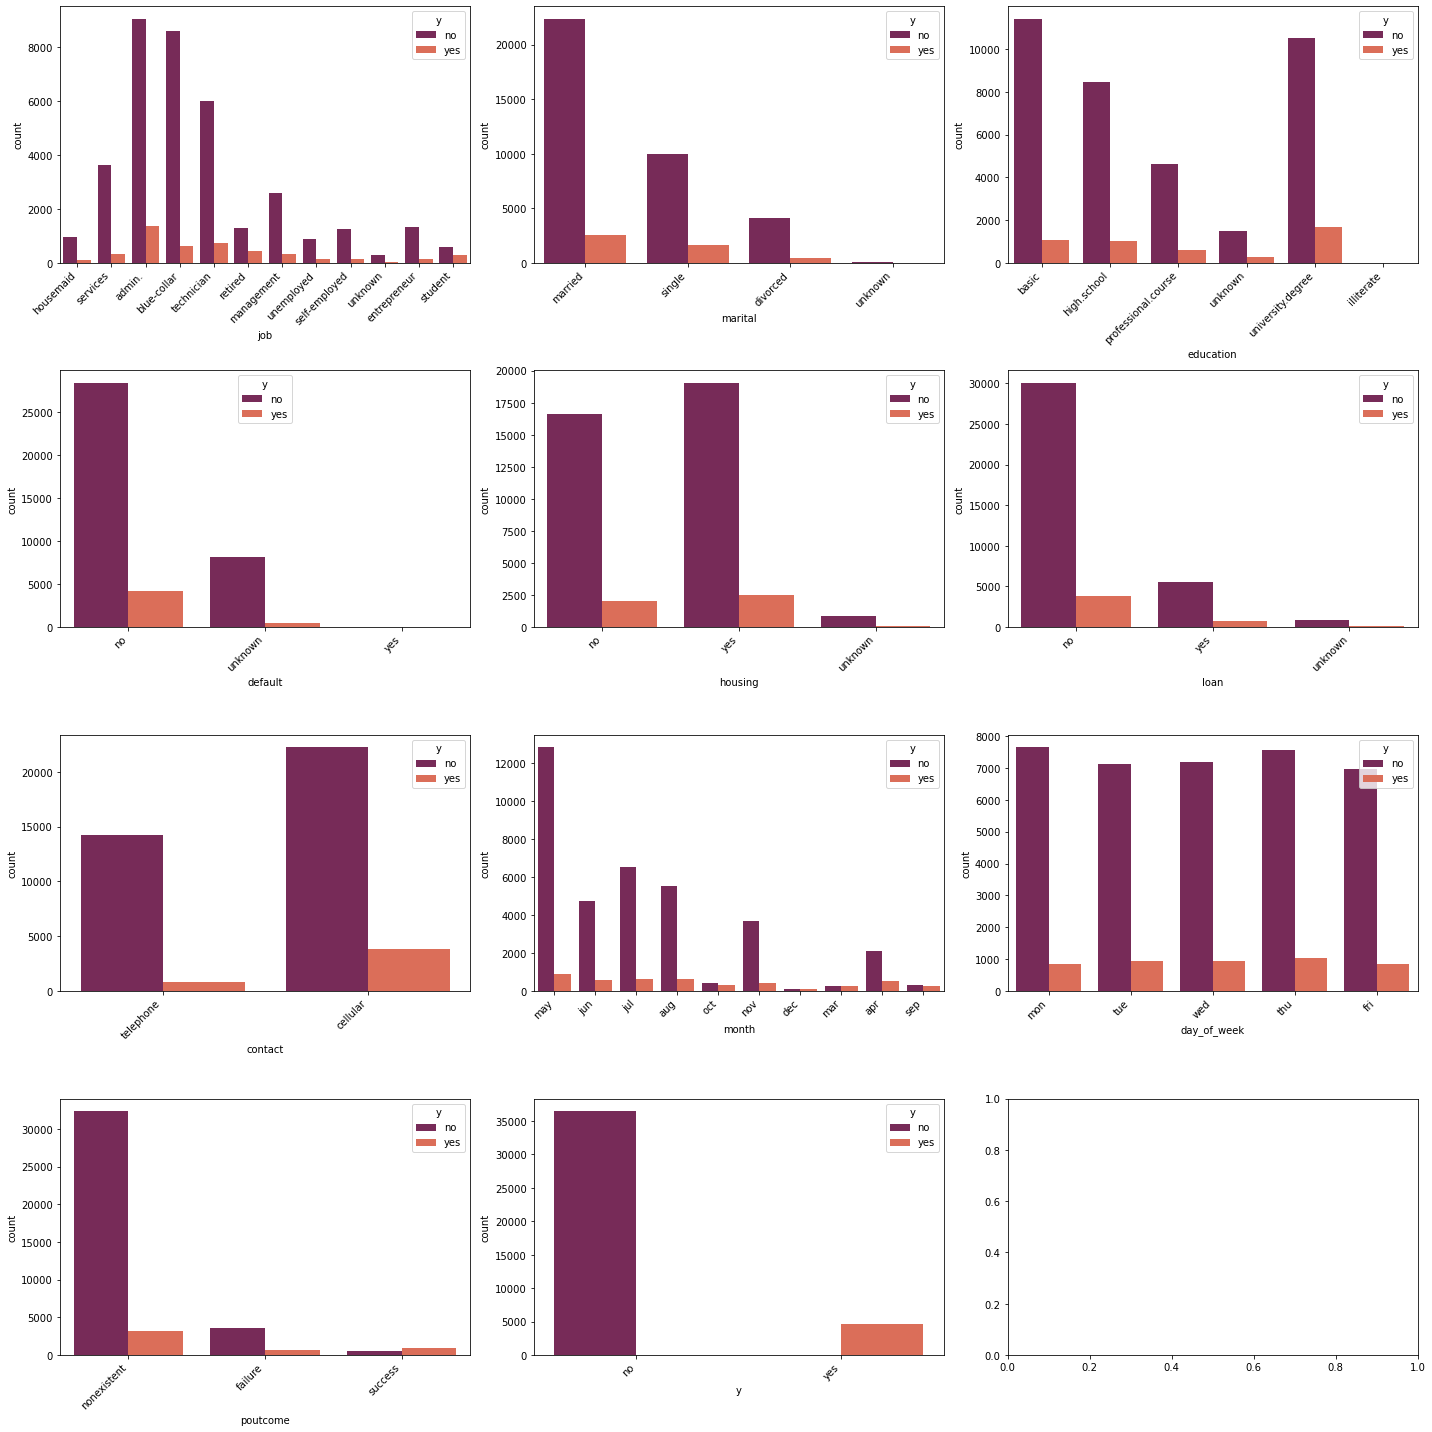

In [ ]:
fig, ax = plt.subplots(4,3, figsize = (20,20))
ax = np.ravel(ax)
for i in range(len(categorical)):
    sns.countplot(data = data, x = categorical[i], hue = "y", ax = ax[i], palette = "rocket")
    ax[i].set_xticklabels(labels = data[categorical[i]].unique(), rotation = 45, ha = 'right')
ax = np.reshape(ax, (4, 3))
plt.tight_layout()

The two previously attached graphics show the counts of observations in each categorical bin using bars. As we can see, there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [ ]:
columns = ['education','job','housing','loan']
for column in columns:
    data[column + '_unknown'] = (data[column] == 'unknown').astype(int)

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_unknown,job_unknown,housing_unknown,loan_unknown
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0


### Filling missing values

As we can see, there is some specific value - unknown. Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. It is natural that job is influenced by education.

In [ ]:
pd.crosstab(data['job'], data['education'])

education,basic,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,
admin.,727,3329,1,363,5750,249
blue-collar,7366,878,8,453,94,454
entrepreneur,418,234,2,135,610,57
housemaid,645,174,1,59,139,42
management,351,298,0,89,2063,123
retired,817,276,3,241,284,97
self-employed,338,118,3,168,765,29
services,746,2680,0,218,173,150
student,138,357,0,43,170,167


In [ ]:
data['job'][data['age']>60].value_counts()

retired          677
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

Also, we will classify people who are over 60 years old as retired.

In [ ]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'

From the cross-tabulation, we can conlude that:
- people with basic education usually have blue - collar jobs (wherever 'education'= basic and job='unknown', we can replace 'job' with 'blue - collar');
- people with professional.course education usually have technician jobs (wherever 'education'= professional.course and job='unknown', we can replace 'job' with 'technician')
- people with management jobs usually have a university degree (wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree');
- people with services jobs usually have high school education (wherever 'job' = services and 'education' = unknown, we can replace 'education' with 'high.school');
- people housemaid jobs usually have a basic.4y (wherever 'job' = housemaid and 'education' = unknown, we can replace 'education' with 'basic.




In [ ]:
data.loc[(data['job']=='unknown') & (data['education']=='basic'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic'

We will fill the remaining "unknown" examples with the most frequent values.

In [ ]:
data.loc[(data['job'] == 'unknown'), 'job'] = data["job"].mode().iloc[0]
data.loc[(data['education'] == 'unknown'), 'education'] = data["education"].mode().iloc[0]
data.loc[(data['marital'] == 'unknown'), 'marital'] = data["marital"].mode().iloc[0]

In [ ]:
pd.crosstab(data['job'], data['education'])

education,basic,high.school,illiterate,professional.course,university.degree
job,,,,,
admin.,1093,3366,1,363,5794
blue-collar,7921,878,8,453,94
entrepreneur,475,234,2,135,610
housemaid,687,174,1,59,139
management,351,298,0,89,2186
retired,932,276,3,243,285
self-employed,367,118,3,168,765
services,746,2830,0,218,173
student,305,357,0,43,170


Checking "loan" and "housing" column.

In [ ]:
pd.crosstab(data['job'], data['loan'])

loan,no,unknown,yes
job,,,
admin.,8644,231,1742
blue-collar,7729,241,1384
entrepreneur,1214,36,206
housemaid,877,29,154
management,2414,71,439
retired,1450,44,245
self-employed,1186,40,195
services,3265,101,601
student,710,23,142


In [ ]:
pd.crosstab(data['job'], data['housing'])

housing,no,unknown,yes
job,,,
admin.,4719,231,5667
blue-collar,4361,241,4752
entrepreneur,641,36,779
housemaid,491,29,540
management,1363,71,1490
retired,787,44,908
self-employed,641,40,740
services,1817,101,2049
student,381,23,471


As there is no other patern, we will randomly split "unknown" data to known values by percentage share, to save data distribution as it was before imputation.

In [ ]:
def fill_by_percentage_share(column):
    for job in data["job"].unique():
        job_data = data[data["job"] == job].reset_index(drop=True)
        column_yes = len(job_data[job_data[column] == "yes"])
        column_no = len(job_data[job_data[column] == "no"])
        column_unknown = len(job_data[job_data[column] == "unknown"])
        cumulative_column = column_yes + column_no

        percentage_yes = column_yes / cumulative_column
        percentage_no = column_no / cumulative_column

        fill_unknown = np.random.choice(['yes', 'no'],
                                         p = [percentage_yes, percentage_no],
                                         size = column_unknown)

        k = 0
        for i in range(len(data)):
            if data["job"][i] == job and data[column][i] == "unknown":
                data[column][i] = data[column][i].replace("unknown", fill_unknown[k])
                k = k + 1

In [ ]:
fill_by_percentage_share("housing")
fill_by_percentage_share("loan")

In [ ]:
pd.crosstab(data['job'], data['housing'])

housing,no,yes
job,,
admin.,4827,5790
blue-collar,4474,4880
entrepreneur,659,797
housemaid,505,555
management,1397,1527
retired,802,937
self-employed,658,763
services,1864,2103
student,391,484


In [ ]:
pd.crosstab(data['job'], data['loan'])

loan,no,yes
job,,
admin.,8838,1779
blue-collar,7930,1424
entrepreneur,1245,211
housemaid,903,157
management,2472,452
retired,1489,250
self-employed,1220,201
services,3355,612
student,731,144


We will check again values, after imputation.

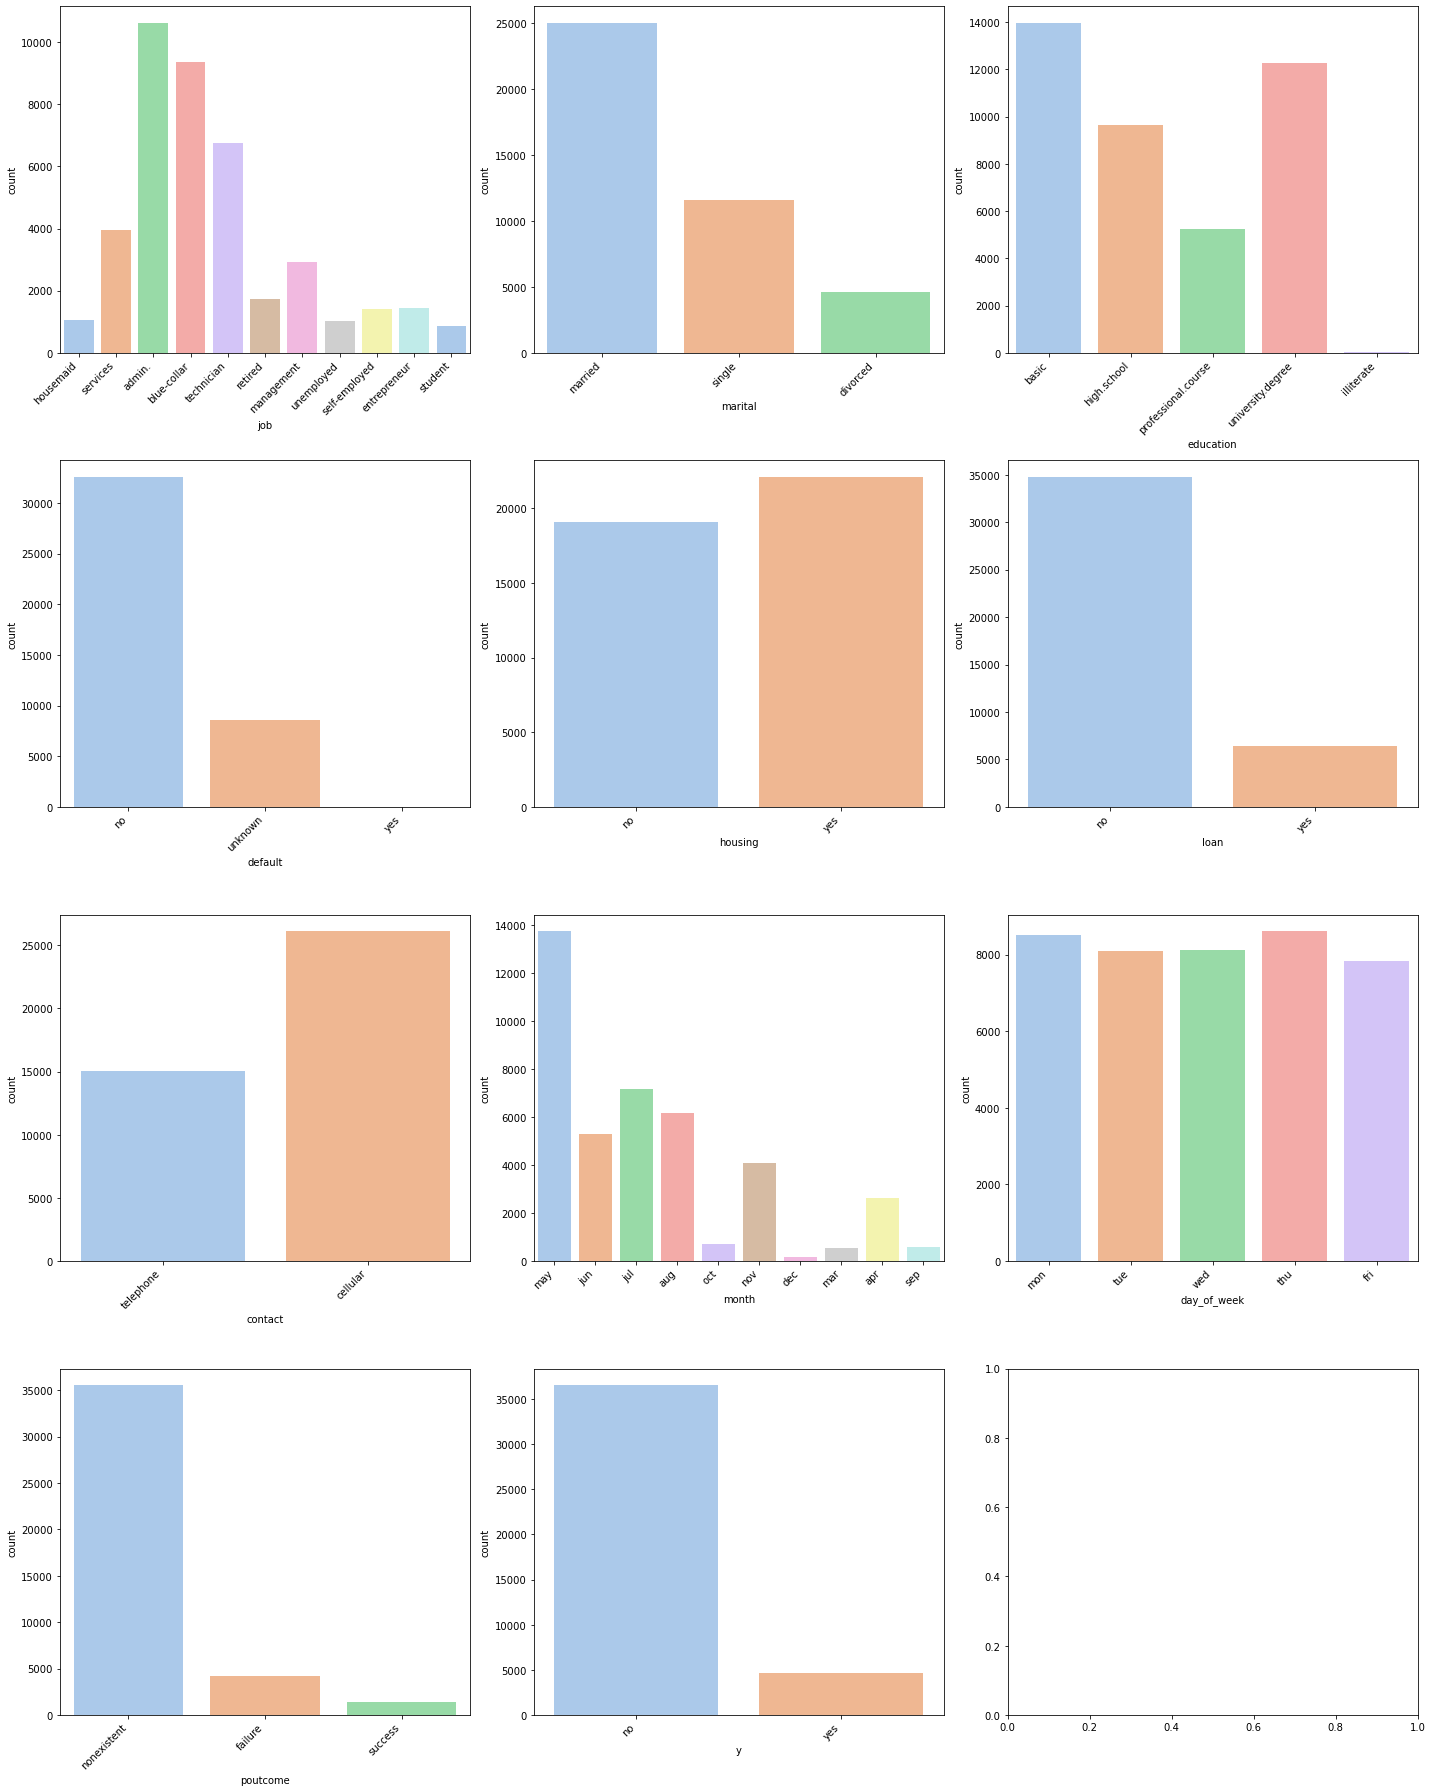

In [ ]:
# a figure of size 20x15 is created, which will contain 12 graphics, 4 columns, 3 rows
fig, ax = plt.subplots(4,3, figsize = (20,25))
ax = np.ravel(ax)
for i in range(len(categorical)):
    sns.countplot(data = data, x = categorical[i], ax = ax[i], palette = "pastel")
    ax[i].set_xticklabels(labels = data[categorical[i]].unique(), rotation = 45, ha = 'right')
ax = np.reshape(ax, (4, 3))
plt.tight_layout()

### Plot continual

In [ ]:
data[continuous].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


It seems as there are some untipical values in some columns.

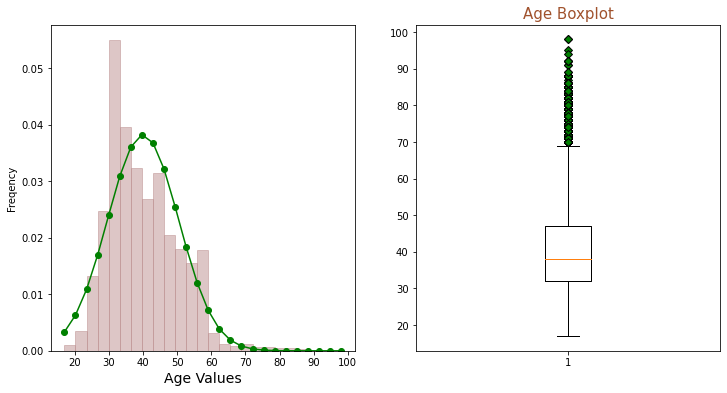

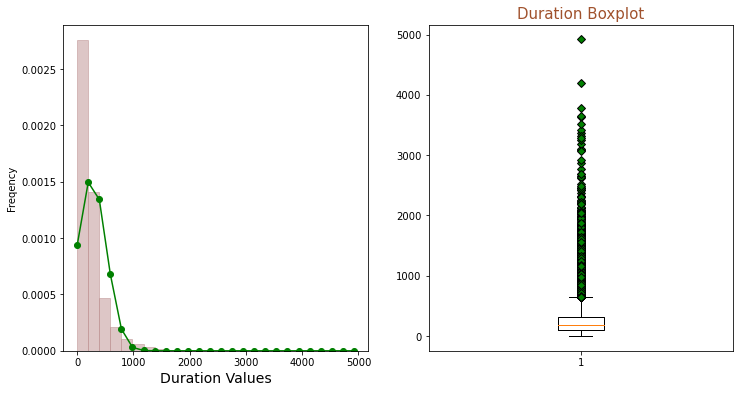

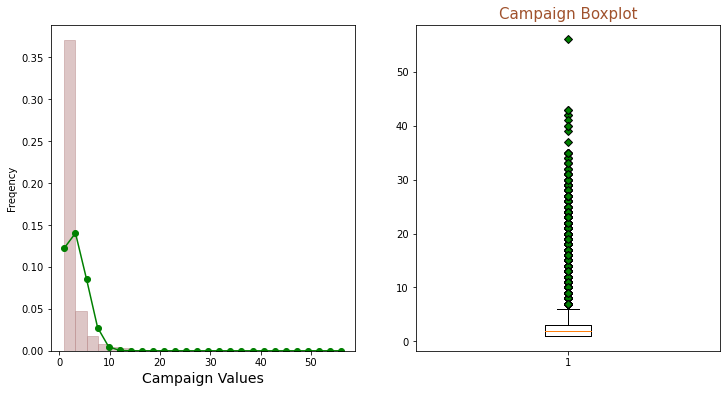

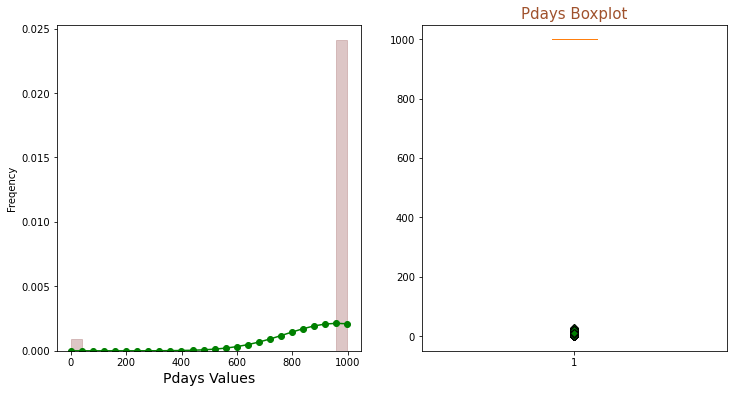

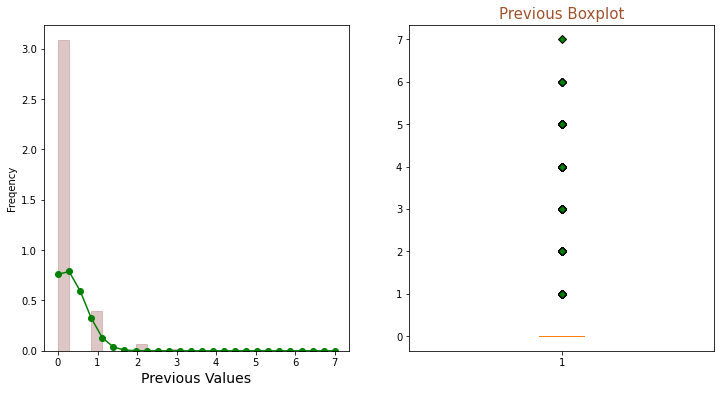

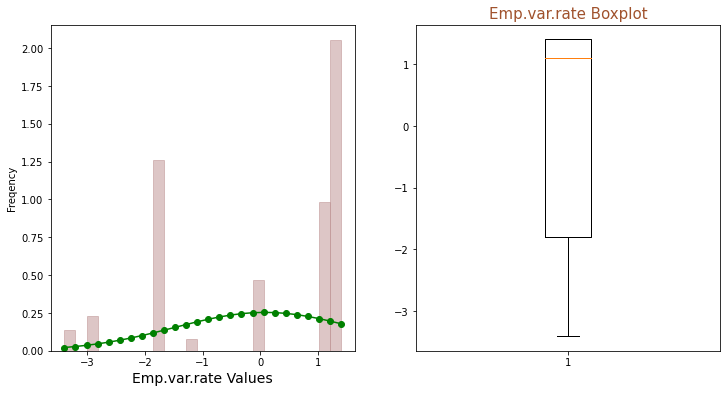

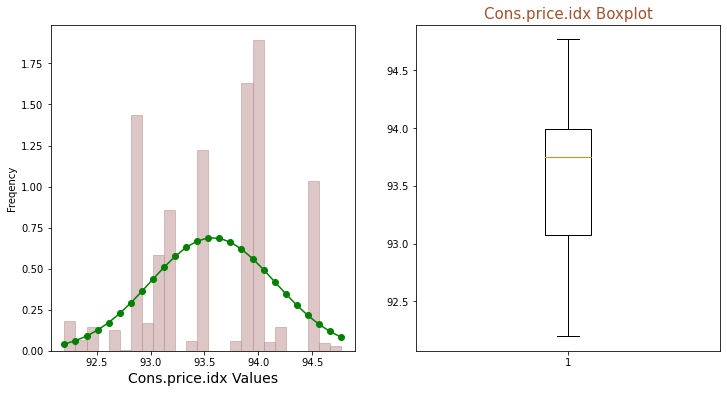

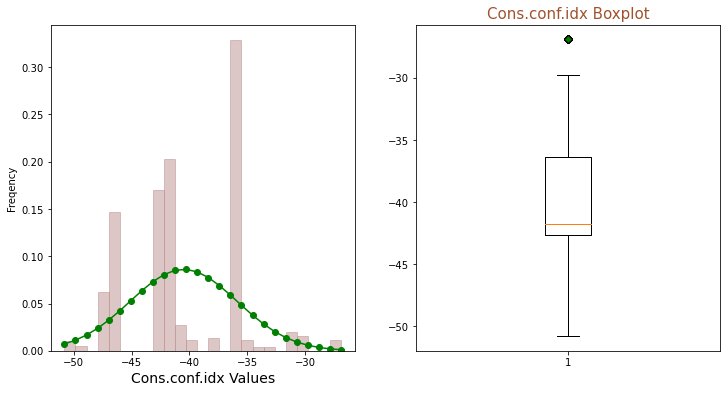

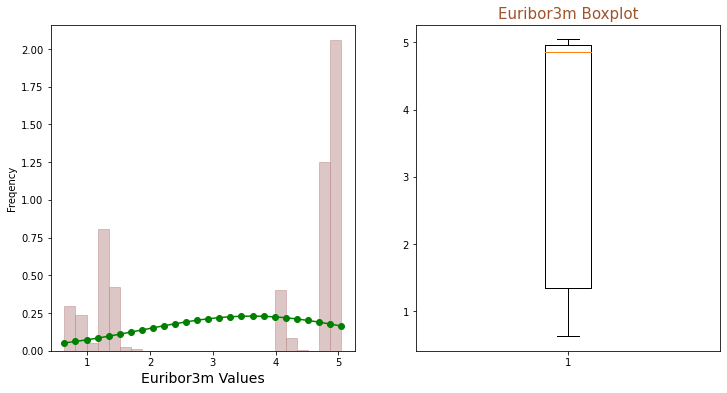

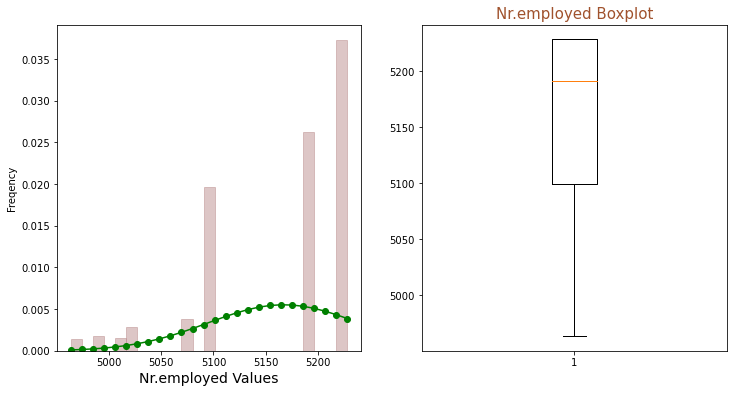

In [ ]:
for column_name in continuous:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Distribution Num. Feature
    _, bins, _ = ax1.hist(data[column_name], bins = 25,
                          density = 1, alpha = 0.5,
                          color = 'rosybrown',
                          ec= 'rosybrown' )

    mu, sigma = stats.norm.fit(data[column_name])
    best_fit_line = stats.norm.pdf(bins, mu, sigma)

    ax1.plot(bins, best_fit_line, 'g-o')

    ax1.set_ylabel('Freqency')
    ax1.set_xlabel(column_name.capitalize() + " Values",fontsize=14)

    # Boxplot
    green_diamond = dict(markerfacecolor='g', marker='D')
    ax2.boxplot(data[column_name],flierprops=green_diamond)

    ax2.set_title(column_name.capitalize() + " Boxplot",
                  fontdict=dict(
                  family="DejaVu Sans",
                  size=15,
                  color="sienna"))
    plt.show()

With these graphs, we can see the distribution and boxplot for each numerical attribute. For feature 'age' we could say that  has normal distribution. Also, we can easily see outliers on box plots. For some attributes we can see that there are values that are dominant in relation to others. We will further explore the 'pdays' attribute:

In [ ]:
data['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

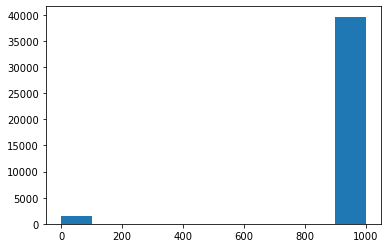

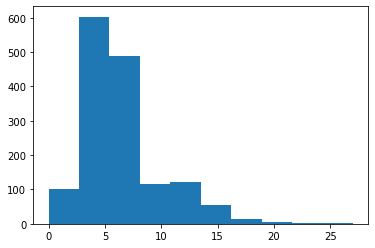

In [ ]:
plt.hist(data['pdays'])
plt.show()

plt.hist(data.loc[data['pdays'] !=999,'pdays'])
plt.show()

As we can see from the above plots, the majority of the values for 'pdays' are missing. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following multiple categories: p_days_unknown, pdays_bellow_5, pdays_between_5_15, and pdays_above_15.

In [ ]:
#Add new categorical variables to our dataframe.
data['pdays_unknown'] = 0
data['pdays_unknown'][data['pdays']==999] = 1

In [ ]:
data['pdays_bellow_5']=0
data['pdays_bellow_5'][data['pdays']<5]=1

In [ ]:
data['pdays_between_5_15'] = 0
data['pdays_between_5_15'][(data['pdays']>=5) & (data['pdays']<=15)] = 1

In [ ]:
data['pdays_above_15'] = 0
data['pdays_above_15'][(data['pdays']>15) & (data['pdays']<999)] = 1

In [ ]:
data.drop('pdays', axis=1);

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,education_unknown,job_unknown,housing_unknown,loan_unknown,pdays_unknown,pdays_bellow_5,pdays_between_5_15,pdays_above_15
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,5191.0,no,0,0,0,0,1,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,5191.0,no,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,5191.0,no,0,0,0,0,1,0,0,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,5191.0,no,0,0,0,0,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,5191.0,no,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,4963.6,yes,0,0,0,0,1,0,0,0
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,4963.6,no,0,0,0,0,1,0,0,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,4963.6,no,0,0,0,0,1,0,0,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,4963.6,yes,0,0,0,0,1,0,0,0


From graphs it is obvios that there are some untipical values (outliers) in "duration" and "campaign" feature, so I decided to modify this values. The strategy is changing values with 95-percentile of current feature.

In [ ]:
def outliers_modification(data, column):
    for i in range(len(data)):
        if data[column][i] > np.percentile(data[column].unique(), 95):
            data[column][i] = np.percentile(data[column].unique(), 95)
    return data

In [ ]:
for column in ["duration", "campaign"]:
    data = outliers_modification(data, column)

<AxesSubplot:>

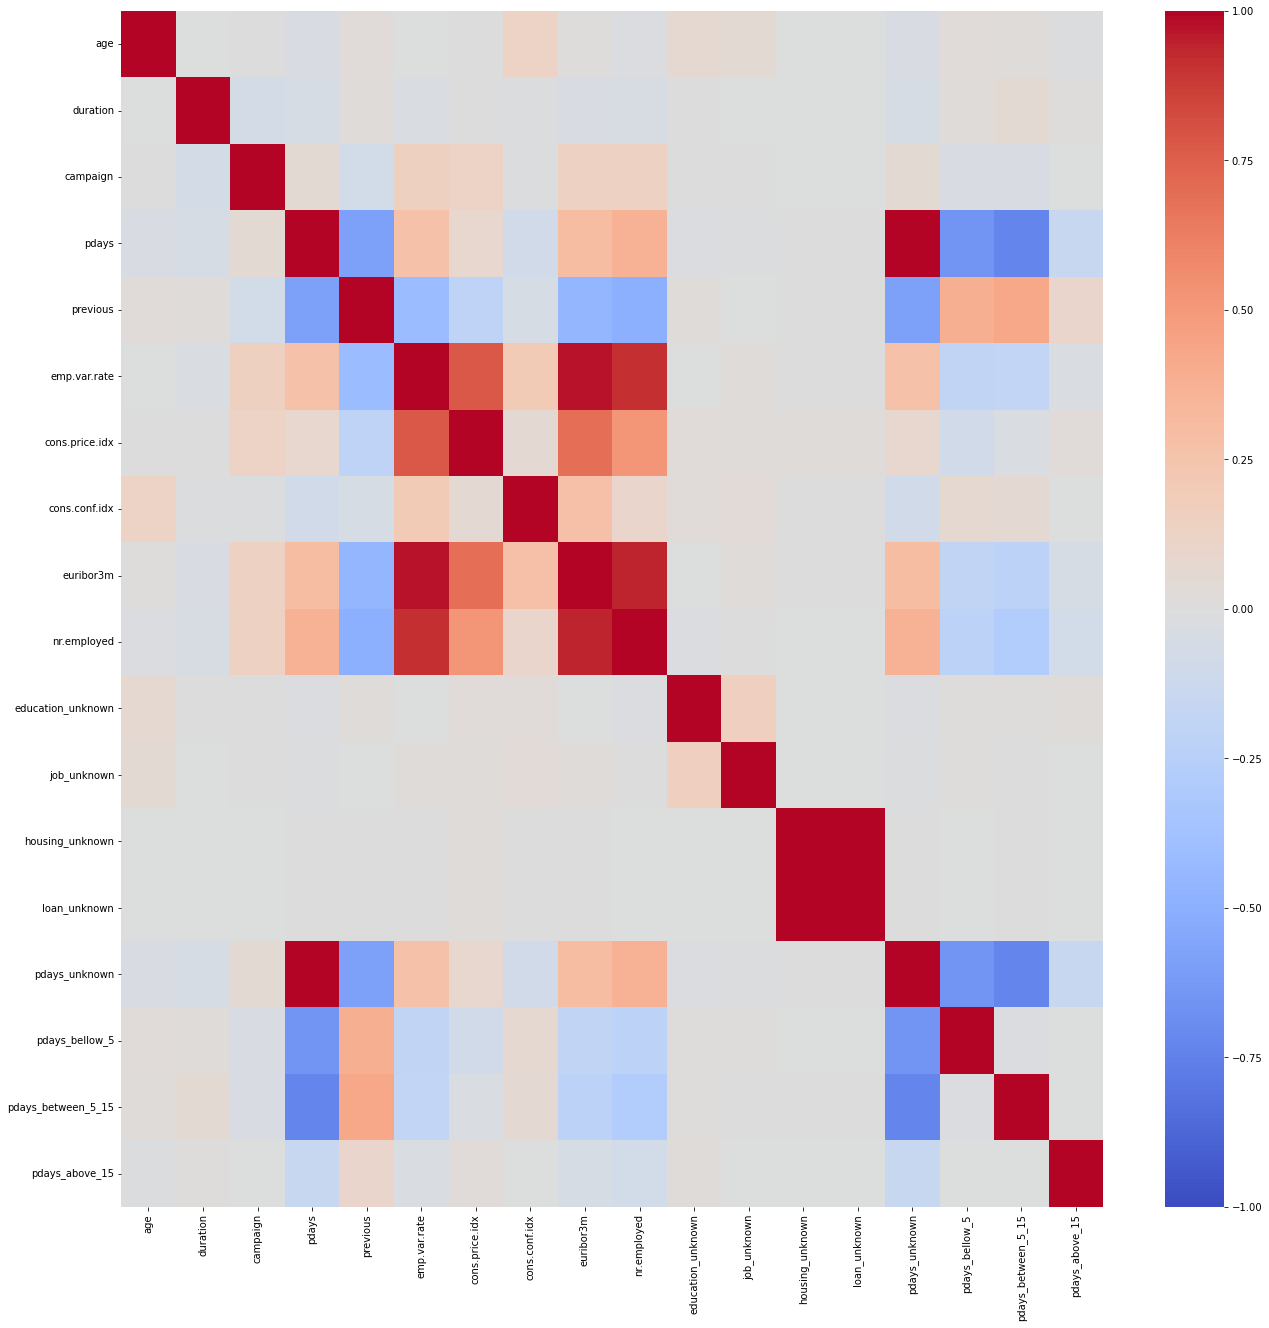

In [ ]:
# correlation matrix - before encoding
plt.figure(figsize=(22, 22))
sns.heatmap(data.corr(), cmap="coolwarm", vmin=-1, vmax=1)

Convert binary clasified columns into numeric value

In [ ]:
def map_columns_helper_method(data, column):
    mapping = data[column].apply(lambda row: 1 if row == 'yes' else 0)
    return mapping

In [ ]:
data['is_default'] = map_columns_helper_method(data, "default")
data['is_housing'] = map_columns_helper_method(data, "housing")
data['is_loan'] = map_columns_helper_method(data, "loan")
data['target'] = map_columns_helper_method(data, "y")

Creating one-hot encoding for non-numeric marital column

In [ ]:
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
data = pd.concat([data, marital_dummies], axis=1)

Creating one hot encoding for job column

In [ ]:
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
data = pd.concat([data, job_dummies], axis=1)

Creating one hot encoding for education column

In [ ]:
education_dummies = pd.get_dummies(data['education'], prefix = 'education')
data = pd.concat([data, education_dummies], axis=1)

Creating one hot encoding for contact column

In [ ]:
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
data = pd.concat([data, contact_dummies], axis=1)

Creating one hot encoding for poutcome column


In [ ]:
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
data = pd.concat([data, poutcome_dummies], axis=1)

Convert month column into numeric value

In [ ]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
data['month'] = data['month'].map(months)

Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns becouse they are encoded above and won't be used in next steps.

In [ ]:
data.drop(categorical, axis=1, inplace=True)

In [ ]:
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,1,0,1,0,0,1,0
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,1,0,1,0,0,1,0
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,1,0
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
data.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
education_unknown                  int32
job_unknown                        int32
housing_unknown                    int32
loan_unknown                       int32
pdays_unknown                      int64
pdays_bellow_5                     int64
pdays_between_5_15                 int64
pdays_above_15                     int64
is_default                         int64
is_housing                         int64
is_loan                            int64
target                             int64
marital_divorced                   uint8
marital_married                    uint8
marital_single  

<AxesSubplot:>

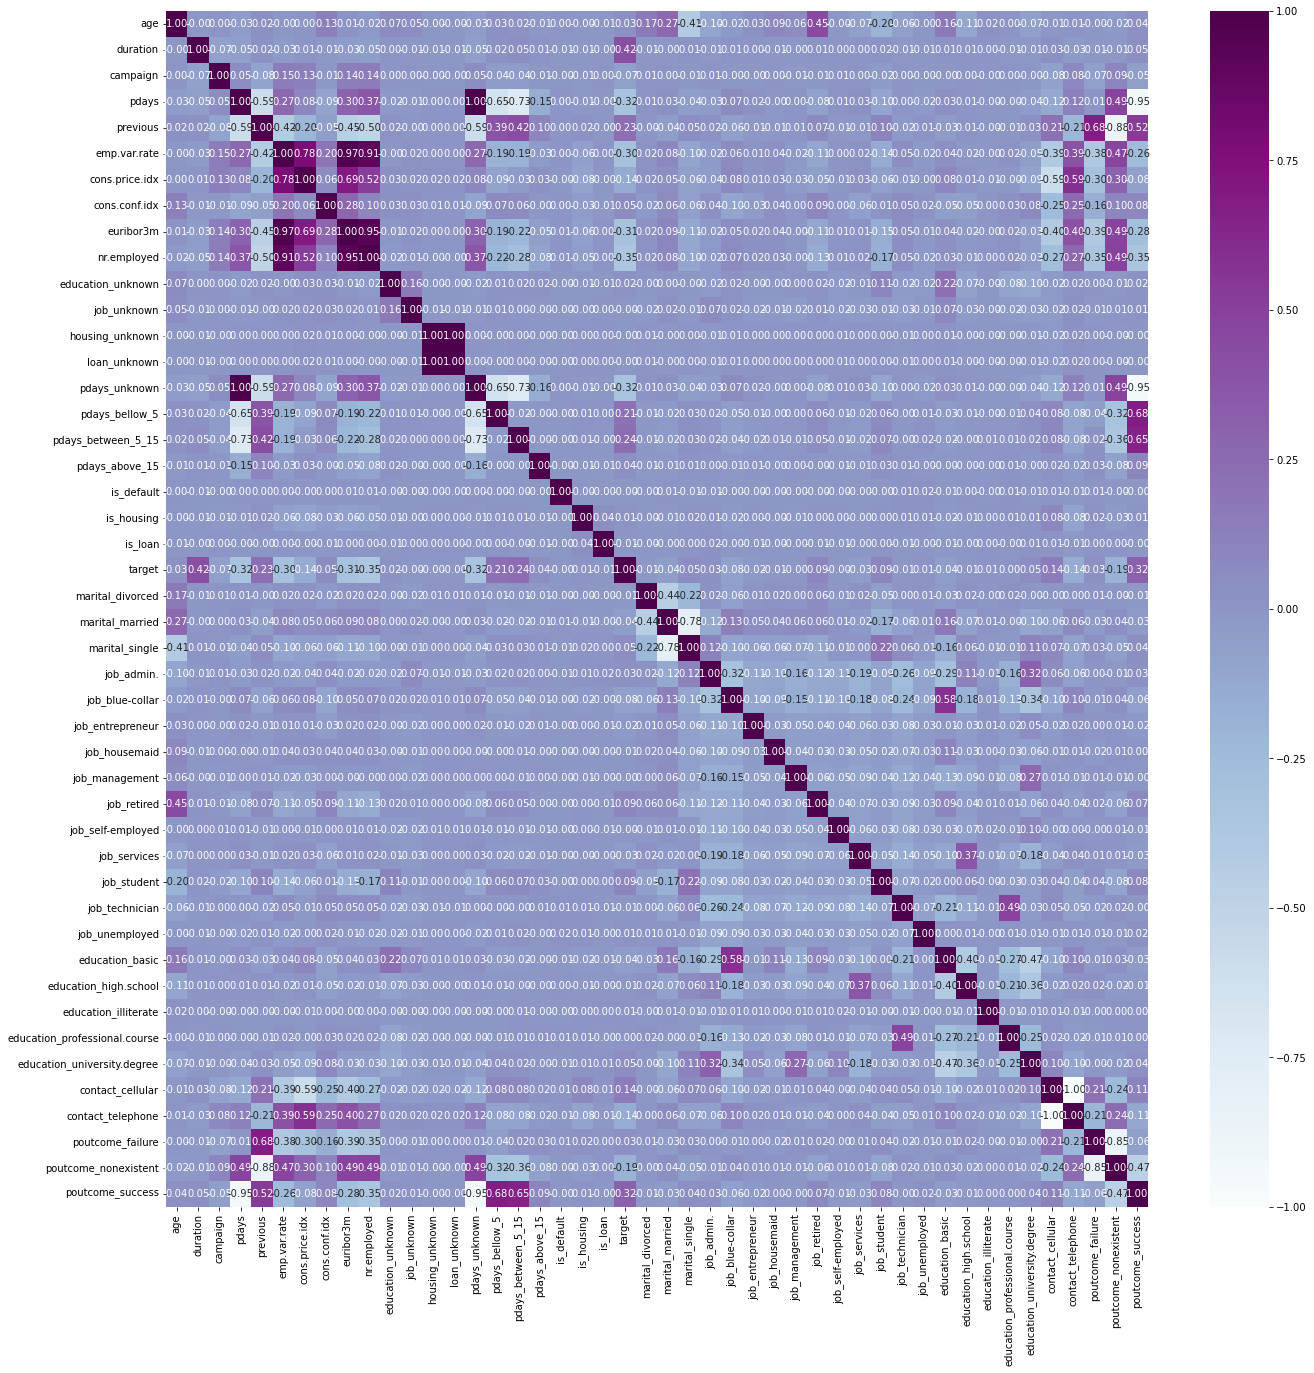

In [ ]:
plt.figure(figsize=(22, 22))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="BuPu")

### Dimensionality reduction analysis

Dimensionality reduction is a machine learning or statistical technique of reducing the amount of random variables in a problem by obtaining a set of principal variables.

In [ ]:
# for data scaling it will be used MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

### Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data.drop(columns=["target"]))
Y = data["target"]

Method initialisation:

In [ ]:
random_state = 0
pca = PCA(n_components = 2, random_state = random_state)

Apply method:

In [ ]:
pca_result = pca.fit_transform(X)

In [ ]:
expl_var_pca = np.var(pca_result, axis=0)
print('explained variance pca: ', expl_var_pca)

explained variance pca:  [0.67486072 0.4754052 ]


The larger the variance explained by a principal component, the more important that component is.

In [ ]:
pca_result = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])

In [ ]:
pca_result["target"] = Y

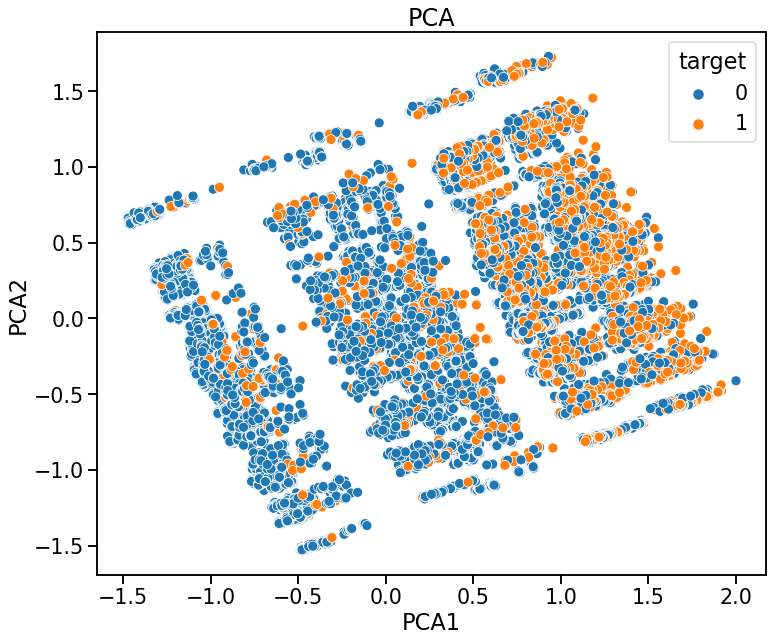

In [ ]:
plt.figure(figsize=(12,10))
with sns.plotting_context("talk",font_scale=1.25):
    sns.scatterplot(x="PCA1", y="PCA2",
                    data=pca_result,
                    hue="target",
                    s=100)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title("PCA", size=24)

In [ ]:
pca = PCA(n_components = 0.95, random_state = random_state).fit(X)

In [ ]:
pca.explained_variance_ratio_.sum()

0.9506358241654863

In [ ]:
number_of_thicks = len(pca.explained_variance_ratio_) + 1

In [ ]:
len(pca.explained_variance_)

20

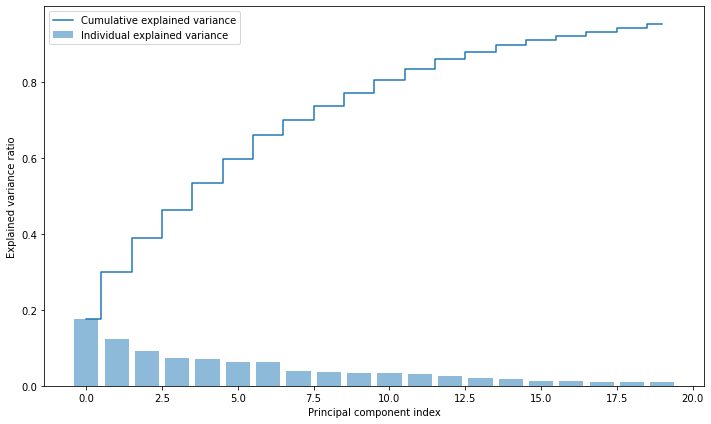

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(10,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- explained_variance_ratio_ method of PCA is used to get the ration of variance (eigenvalue / total eigenvalues)
- Bar chart is used to represent individual explained variances.
- Step plot is used to represent the variance explained by different principal components.

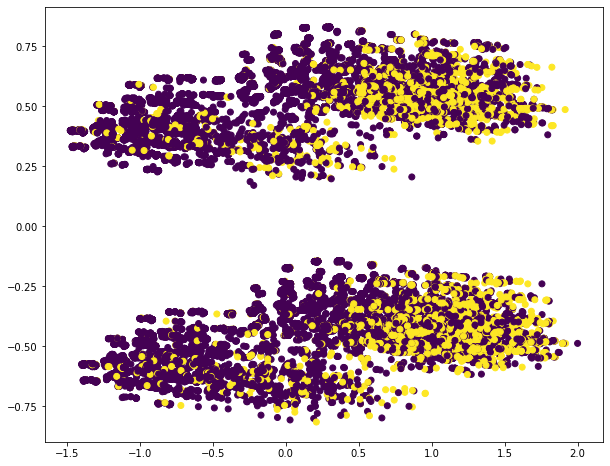

In [ ]:
pca2 = PCA(n_components=10)
pca2.fit(X)
x_3d = pca2.transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(x_3d[:,0], x_3d[:,5], c=Y)
plt.show()

The similar process will be implemented on following alghoritms.

#### Singular Value Decomposition

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=2, random_state=random_state)
svd_result = svd.fit_transform(X)

In [ ]:
svd_result = pd.DataFrame(svd_result, columns=["SVD1", "SVD2"])

In [ ]:
svd_result["target"] = Y

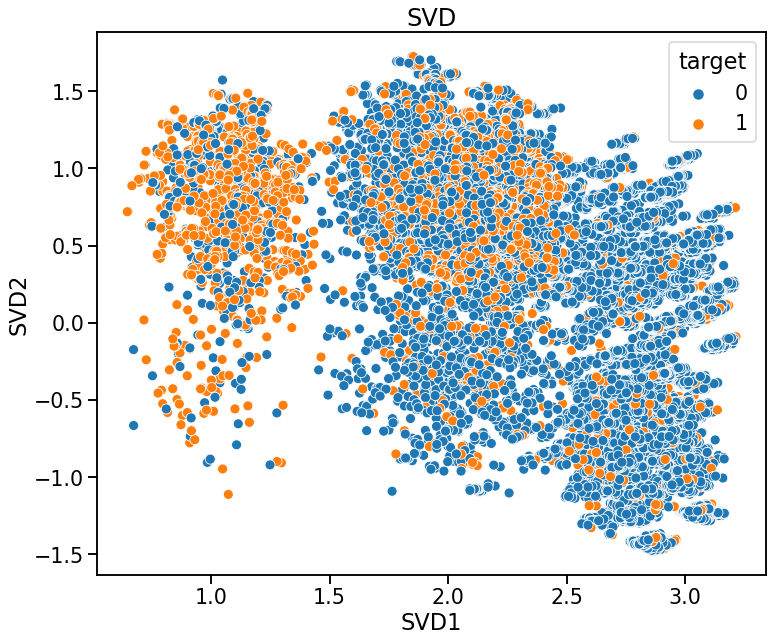

In [ ]:
plt.figure(figsize=(12,10))
with sns.plotting_context("talk",font_scale=1.25):
    sns.scatterplot(x="SVD1", y="SVD2",
                    data=svd_result,
                    hue="target",
                    s=100)
    plt.xlabel("SVD1")
    plt.ylabel("SVD2")
    plt.title("SVD", size=24)

In [ ]:
svd.explained_variance_ratio_.sum()

0.21373125572451834

#### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
tsne_result= tsne.fit_transform(X)

In [ ]:
tsne_result = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])

In [ ]:
tsne_result["target"] = Y

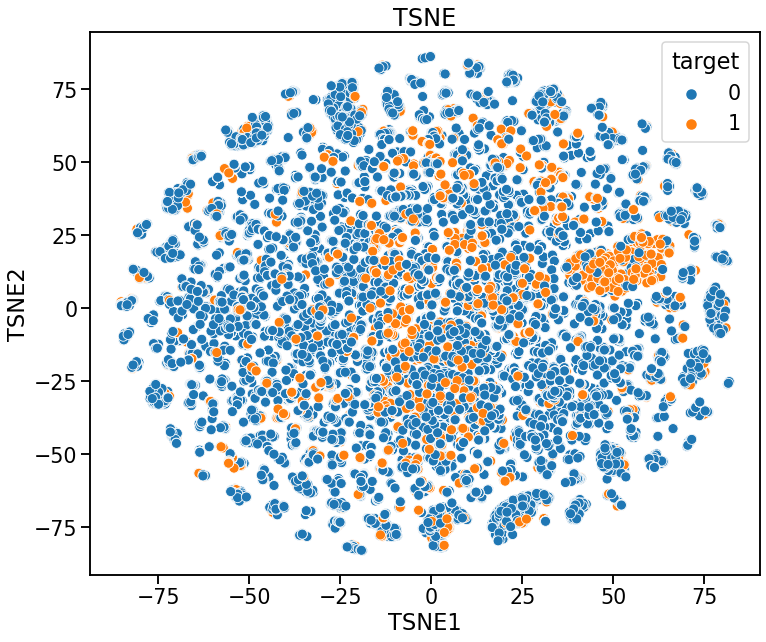

In [ ]:
plt.figure(figsize=(12,10))
with sns.plotting_context("talk",font_scale=1.25):
    sns.scatterplot(x="TSNE1", y="TSNE2",
                    data=tsne_result,
                    hue="target",
                    s=100)
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.title("TSNE", size=24)